# We Rate Dogs 

## Introduction
- WeRateDogs is a popular Twitter account with 9.3 million followers that rates people's dogs with a humorous comment. To gather data for analysis, we used pandas and the Twitter API to obtain information from three different files. We then conducted both visual and programmatic assessments to identify quality and tidiness issues in the data, including duplicates, missing values, and inaccuracies.


- To address these issues, we followed a structured approach that involved defining the problem, writing code to clean the data, and testing to ensure that the data was trustworthy. Finally, we visualised the cleaned data to gain insights and answer questions.


- One such question was which breed of dogs received the highest number of favorites. Our analysis found that Golden Retriever, Labrador Retriever, and Pembroke were the top three breeds with the highest number of favorites. Among these breeds, Golden Retriever had the highest count of 1,257,407 favorites. The mean number of favorites for predicted breeds was 123,233.15, with a standard deviation of 337,460.92.

In [1]:
# Import necessary libraries
import json
import numpy as np
import pandas as pd
import requests
import tweepy
from io import BytesIO
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.ticker import ScalarFormatter

%matplotlib inline


### Gathering

In [2]:
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.shape

(2356, 17)

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
print(response.status_code)

with open("image_predictions.tsv", mode='wb') as file:
    file.write(response.content)

predict = pd.read_csv('image_predictions.tsv', sep='\t')
predict.shape

200


(2075, 12)

In [4]:
# import from csv
json = pd.read_json('tweet_json.txt', lines=True)

In [5]:
json['tweet_id'] = json['id']

In [6]:
#Selecting columns 
twitter_api = json[['tweet_id','retweet_count', 'favorite_count']]

In [7]:
# Merging for Assesing
m1 = pd.merge(twitter_api, archive, on="tweet_id", how='left')
m2 = pd.merge(m1, predict, on="tweet_id", how='left')
df_final = m2

## Assesing 

In [8]:
pd.set_option("max_colwidth", 10)
pd.set_option('display.max_columns', 30)
df_final.head()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020...,416,2234,NaN,NaN,2015-1...,<a hre...,Here w...,NaN,NaN,NaN,https:...,8,10,None,None,None,None,None,https:...,1,Welsh_...,0.465074,True,collie,0.156665,True,Shetla...,0.061428,True
1,666029...,39,111,NaN,NaN,2015-1...,<a hre...,This i...,NaN,NaN,NaN,https:...,7,10,a,None,None,None,None,https:...,1,redbone,0.506826,True,miniat...,0.074192,True,Rhodes...,0.072010,True
2,666033...,35,98,NaN,NaN,2015-1...,<a hre...,Here i...,NaN,NaN,NaN,https:...,9,10,a,None,None,None,None,https:...,1,German...,0.596461,True,malinois,0.138584,True,bloodh...,0.116197,True
3,666044...,113,244,NaN,NaN,2015-1...,<a hre...,This i...,NaN,NaN,NaN,https:...,6,10,a,None,None,None,None,https:...,1,Rhodes...,0.408143,True,redbone,0.360687,True,miniat...,0.222752,True
4,666049...,36,86,NaN,NaN,2015-1...,<a hre...,Here w...,NaN,NaN,NaN,https:...,5,10,None,None,None,None,None,https:...,1,miniat...,0.560311,True,Rottwe...,0.243682,True,Doberman,0.154629,True


In [9]:
df_final.tail()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2051,891327...,7620,34385,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,12,10,Franklin,None,None,None,None,https:...,2,basset,0.555712,True,Englis...,0.225770,True,German...,0.175219,True
2052,891689...,7103,35974,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Darla,None,None,None,None,https:...,1,paper_...,0.170278,False,Labrad...,0.168086,True,spatula,0.040836,False
2053,891815...,3427,21435,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,12,10,Archie,None,None,None,None,https:...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2054,892177...,5193,28505,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Tilly,None,None,None,None,https:...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2055,892420...,6893,32964,NaN,NaN,2017-0...,<a hre...,This i...,NaN,NaN,NaN,https:...,13,10,Phineas,None,None,None,None,https:...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   retweet_count               2056 non-null   int64  
 2   favorite_count              2056 non-null   int64  
 3   in_reply_to_status_id       23 non-null     float64
 4   in_reply_to_user_id         23 non-null     float64
 5   timestamp                   2056 non-null   object 
 6   source                      2056 non-null   object 
 7   text                        2056 non-null   object 
 8   retweeted_status_id         70 non-null     float64
 9   retweeted_status_user_id    70 non-null     float64
 10  retweeted_status_timestamp  70 non-null     object 
 11  expanded_urls               2056 non-null   object 
 12  rating_numerator            2056 non-null   int64  
 13  rating_denominator          2056 

In [11]:
df_final.describe()

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,2.0560...,2056.0...,2056.0...,2.3000...,2.3000...,7.0000...,7.0000...,2056.0...,2056.0...,2056.0...,2056.0...,2.0560...,2.0560...
mean,7.3770...,2324.1...,7265.5...,6.9781...,4.1969...,7.5925...,1.1249...,12.265078,10.516051,1.204280,0.594386,1.3476...,6.0401...
std,6.7514...,4062.0...,10992....,4.3593...,0.0000...,5.6954...,9.4119...,40.867720,7.210005,0.563359,0.271242,1.0074...,5.1002...
min,6.6602...,11.000000,0.000000,6.6715...,4.1969...,6.6750...,7.8321...,0.000000,2.000000,1.000000,0.044333,1.0113...,1.7401...
25%,6.7623...,494.75...,1385.2...,6.7324...,4.1969...,7.0863...,4.1969...,10.000000,10.000000,1.000000,0.363272,5.3893...,1.6234...
50%,7.1100...,1094.0...,3183.0...,6.7570...,4.1969...,7.7559...,4.1969...,11.000000,10.000000,1.000000,0.587797,1.1863...,4.9479...
75%,7.9280...,2673.2...,9028.7...,7.0314...,4.1969...,7.9479...,4.1969...,12.000000,10.000000,1.000000,0.844247,1.9566...,9.2156...
max,8.9242...,69521....,142035...,8.5581...,4.1969...,8.6501...,7.8746...,1776.0...,170.00...,4.000000,1.000000,4.8801...,2.7341...


In [12]:
df_final.describe(include=[object])

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,jpg_url,p1,p2,p3
count,2056,2056,2056,70,2056,2056,2056,2056,2056,2056,2056,2056,2056,2056
unique,2056,3,2056,70,2056,934,2,2,2,2,1997,377,402,407
top,2015-1...,<a hre...,Here w...,2015-1...,https:...,None,None,None,None,None,https:...,golden...,Labrad...,Labrad...
freq,1,2016,1,1,1,570,1978,2048,1836,2032,2,150,104,79


In [13]:
#Cheking for nulls
df_final.isnull().values.sum()

10024

In [14]:
df_final.isnull().sum()

tweet_id                         0
retweet_count                    0
favorite_count                   0
in_reply_to_status_id         2033
in_reply_to_user_id           2033
timestamp                        0
source                           0
text                             0
retweeted_status_id           1986
retweeted_status_user_id      1986
retweeted_status_timestamp    1986
expanded_urls                    0
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
jpg_url                          0
img_num                          0
p1                               0
p1_conf                          0
p1_dog                           0
p2                               0
p2_conf                          0
p2_dog                           0
p3                               0
p3_conf             

In [15]:
#Checking numerator rating
df_final.rating_numerator.value_counts().sort_index(ascending=True)

0         2
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        95
9       151
10      425
11      413
12      471
13      275
14       37
15        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

In [16]:
df_final.rating_numerator.describe()

count    2056.0...
mean     12.265078
std      40.867720
min       0.000000
25%      10.000000
50%      11.000000
75%      12.000000
max      1776.0...
Name: rating_numerator, dtype: float64

In [17]:
#Checking Denominator rating
df_final.rating_denominator.value_counts().sort_index(ascending=True)

2         1
7         1
10     2038
11        2
20        1
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [18]:
#Inspecting for duplicates
df_final.duplicated().sum()

0

In [19]:
pd.set_option("max_colwidth", 30)
#Inspecting dog breeds
df_final[['p1', 'p2', 'p3']].describe(include=['object'])

,p1,p2,p3
count,2056,2056,2056
unique,377,402,407
top,golden_retriever,Labrador_retriever,Labrador_retriever
freq,150,104,79


In [20]:
#Inspecting confidence levels
df_final[['p1_conf', 'p2_conf',
          'p3_conf']].describe().loc[['min', 'max', 'mean']].round(5)

,p1_conf,p2_conf,p3_conf
min,0.04433,0.00000,0.00000
max,1.00000,0.48801,0.27342
mean,0.59439,0.13477,0.06040


In [21]:
#Inspecting dog stages
df_final[['doggo', 'floofer', 'pupper', 'puppo']].apply(pd.Series.value_counts)

,doggo,floofer,pupper,puppo
None,1978.0,2048.0,1836.0,2032.0
doggo,78.0,NaN,NaN,NaN
floofer,NaN,8.0,NaN,NaN
pupper,NaN,NaN,220.0,NaN
puppo,NaN,NaN,NaN,24.0


In [22]:
#Inspecting Names
df_final.name.loc[50:60]

50      None
51         a
52     Carll
53    Klevin
54      None
55      Keet
56      None
57      Dave
58     Clybe
59      Gabe
60      None
Name: name, dtype: object

In [23]:
#Inspecting favorite and retweet count
df_final[['favorite_count', 'p1', 'p2', 'p3']].min()

favorite_count               0
p1                Afghan_hound
p2                Afghan_hound
p3                Afghan_hound
dtype: object

In [24]:
df_final[['retweet_count', 'p1', 'p2', 'p3']].max()

retweet_count          69521
p1                     zebra
p2               wood_rabbit
p3                     zebra
dtype: object

 ## Observations:
 Quality Issues:
 - Completeness: 10124 missing records.
 - Incorrect datatype in columns: `"tweet_id"`,`"timestamp"` 
 - The `"name"` column has accuracy issues
 - The `"in_reply_to_status_id"`, `"in_reply_to_user_id`` columns has missing values and we are not interest in replies.
 - The `"p1"`,`"p2"`,`"p3"` columns with validity and consistency issues
 - The `"p1_dog"`,`"p2_dog"`,`"p3_dog"` columns  with validity issues
 - We can observe that there are some 'None',objects present in `"doggo"`,`"floofer"`,`"pupper"` and`"puppo"` which have to be convert into 'NaN'

- The `"retweeted_status_id"`, `"retweeted_status_user_id"`,`"retweeted_status_timestamp"` are related to retweets should be dropped
 
 
 
## Tidyness
- The `"p1_conf"`,`"p2_conf"`,`"p3_conf"` are related to dog test, shoud be converted to one column
- The `"doggo"`,`"floofer"`,`"pupper"` and`"puppo"` are related to dog stage and doesnt follow rules of tidy data.

In [25]:
#Creating copies before cleaning
# Making a copies of original pieces
twitter_api_clean = twitter_api.copy()
archive_clean = archive.copy()
predict_clean = predict.copy()

## Clean

### 1. Define
Using pd.isna() on:
`'in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
 'retweeted_status_user_id','retweeted_status_timestamp'`


### Code

In [26]:
null_counts = archive_clean[['in_reply_to_status_id', 'in_reply_to_user_id',                              'retweeted_status_id', 'retweeted_status_user_id',                              'retweeted_status_timestamp']].isnull().sum()
print(null_counts)


in_reply_to_status_id         2278
in_reply_to_user_id           2278
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
dtype: int64


### Test

In [27]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Define
 Fixing Dog Stages

In [28]:
# replacing the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

In [29]:
stage_none = lambda x: 1 if x == 0 else 0

archive_clean['none'] = archive_clean['none'].apply(stage_none)

stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

conditions = [(archive_clean[stage[0]] == 1), (archive_clean[stage[1]] == 1),
              (archive_clean[stage[2]] == 1), (archive_clean[stage[3]] == 1),
              (archive_clean[stage[4]] == 1)]

archive_clean['stage'] = np.select(conditions, stage, default=stage[4])

archive_clean.drop(stage, axis=1, inplace=True)

archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbcm/en/q/19c9fbc

### Test

In [30]:
archive_clean.stage.value_counts()

none       1976
pupper      245
doggo        95
puppo        30
floofer      10
Name: stage, dtype: int64

### 4. Define
 Change ['timestamp'] using pd.to_datetime

### Code

In [31]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

### Test

In [32]:
archive_clean.timestamp.dtypes

datetime64[ns, UTC]

### 5. Define
- Change tweet_id datatype in dataframe from int64 to object 

### Code

In [33]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
predict_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
twitter_api_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)

### Test

In [34]:
archive_clean.tweet_id.dtype

dtype('O')

In [35]:
predict_clean.tweet_id.dtype

dtype('O')

In [36]:
twitter_api_clean.tweet_id.dtype

dtype('O')

### 6. Define
-  Creating new 'breed' and 'confidence' collumn

### Code

In [37]:
breed = []
confidence = []


def choose_breed(predict_clean):
    if predict_clean['p1_dog'] == True:
        breed.append(predict_clean['p1'])
        confidence.append(predict_clean['p1_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)


# function call
predict_clean.apply(choose_breed, axis=1)
# add the two columns
predict_clean['breed'] = breed
predict_clean['confidence'] = confidence
predict_clean.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
855,764857477905154048,https://pbs.twimg.com/medi...,1,car_mirror,0.379797,False,Chesapeake_Bay_retriever,0.321589,True,vizsla,0.116931,True,Unknown,0.0


In [38]:
#fixing breed spelling
predict_clean['breed'] = predict_clean['breed'].str.replace('_', ' ')

In [39]:
# Converting all breeds to lower case
predict_clean['breed'] = predict_clean['breed'].str.lower()

In [40]:
predict_clean.breed.str.replace('unknown', 'np.nan')

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071                    np.nan
2072                 chihuahua
2073                 chihuahua
2074                    np.nan
Name: breed, Length: 2075, dtype: object

### Test

In [41]:
predict_clean.breed.value_counts()

unknown               543
golden retriever      150
labrador retriever    100
pembroke               89
chihuahua              83
                     ... 
japanese spaniel        1
scotch terrier          1
standard schnauzer      1
entlebucher             1
clumber                 1
Name: breed, Length: 112, dtype: int64

### 8. Define
- Converting None to NaN



### Code 

In [42]:
archive_clean.replace(to_replace='None', value=np.nan, inplace=True)
archive_clean.replace(to_replace='Unknown', value=np.nan, inplace=True)
archive_clean.replace(to_replace='unknown', value=np.nan, inplace=True)

### Test

In [43]:
archive_clean[archive_clean == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Final View

In [44]:
df_clean = twitter_api_clean.merge(archive_clean,on='tweet_id',how="right").merge(predict_clean,on='tweet_id',how="right")

In [45]:
df_clean.sample(3)

,tweet_id,retweet_count,favorite_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
1384,700796979434098688,1698.0,6209.0,NaN,NaN,2016-02-19 21:39:54+00:00,"<a href=""http://twitter.co...",This is Daniel. He's a nea...,NaN,NaN,NaN,https://twitter.com/dog_ra...,7,10,Daniel,none,https://pbs.twimg.com/medi...,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True,golden retriever,0.969518
1071,740214038584557568,1436.0,7565.0,NaN,NaN,2016-06-07 16:09:13+00:00,"<a href=""http://twitter.co...",This is getting incredibly...,NaN,NaN,NaN,https://twitter.com/dog_ra...,10,10,getting,none,https://pbs.twimg.com/medi...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True,siberian husky,0.396495
827,769212283578875904,1760.0,4548.0,NaN,NaN,2016-08-26 16:37:54+00:00,"<a href=""http://twitter.co...",This is DonDon. He's way u...,NaN,NaN,NaN,https://twitter.com/dog_ra...,12,10,DonDon,none,https://pbs.twimg.com/ext_...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False,unknown,0.000000


In [46]:
#saving to csv
df_clean.to_csv('twitter_archive_master.csv',index=False)

### Q1.How has the posting frequency of WeRateDogs changed over time?

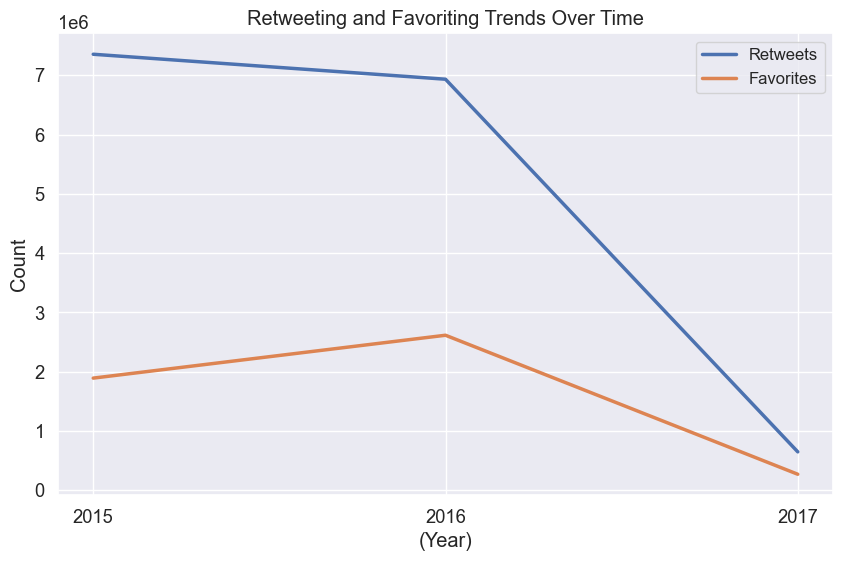

In [47]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set color palette
sns.set_palette("Set1")

# Set plot size and font scale
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.2)

# Extract year from timestamp column
years = df_clean.timestamp.dt.year

# Create a pivot table to calculate the total favorite and retweet counts per year
ret_fav = df_clean.pivot_table(index=years, values=['favorite_count','retweet_count'], aggfunc='sum')

# Create a line plot to show retweeting and favoriting trends over time
ax = ret_fav.plot(kind='line', linewidth=2.5)


# Set plot title, y-label, and x-label
plt.title('Retweeting and Favoriting Trends Over Time')
plt.ylabel('Count')
plt.xlabel('(Year)')

# Set x-axis ticks to display years only
ax.set_xticks(range(min(years), max(years)+1))
ax.set_xticklabels(range(min(years), max(years)+1))

# Add legend to the plot
plt.legend(('Retweets', 'Favorites'), loc='upper right', fontsize='small')

# Set figure size
plt.gcf().set_size_inches(10, 6)

# Save the plot as an image
plt.savefig('ret_fav.png', dpi=100)

# Show the plot
plt.show()


-   Based on the activity over time, it is evident that there was a significant decline in the number of "favorite_count" and "retweet_count" between 2016 and 2017, with a decrease of 42.09% and 49.96% respectively.


### Q2. Among all the breeds of dogs in WeRateDogs, which breed received the highest number of favorite counts?

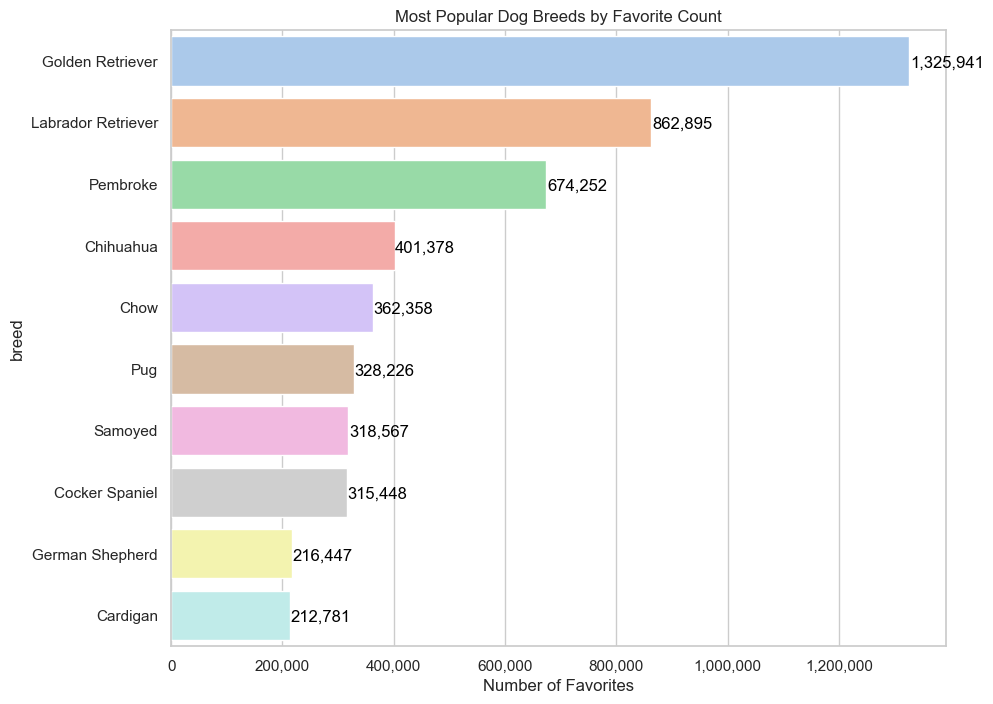

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set color palette
sns.color_palette("mako", as_cmap=True)
color = sns.color_palette("pastel", 10)

# Set plot size and font scale
sns.set(rc={'figure.figsize': (10, 8)})
sns.set(font_scale=1)
sns.set_style("whitegrid")

# Filter data to top 10 breeds by favorite count
top_breeds = df_clean[df_clean.breed != 'unknown'].groupby('breed')['favorite_count'].sum().sort_values(ascending=False)[:10]

# Create a horizontal bar plot of the top 10 breeds with the highest favorite counts
ax = sns.barplot(x=top_breeds.values, y=top_breeds.index, palette=color, orient='h')

# Set plot title, x-label, and y-label
plt.title('Most Popular Dog Breeds by Favorite Count')
plt.xlabel('Number of Favorites')


# set the y-axis labels to title case
ax.set_yticklabels([label.get_text().title() for label in ax.get_yticklabels()])

# Set the x-axis labels to include commas for thousands separators
ax.get_xaxis().set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add labels to the bars in the plot
for i, v in enumerate(ax.patches):
    ax.text(v.get_width() + 1000, i+0.1, f"{int(v.get_width()):,}", color='black', fontweight='light')

# Save the plot as an image with high DPI
plt.savefig('breed', dpi=100)


- We can observe from the plot that the breed with the highest number of likes is "Golden Retriever" with 1,325,942 likes. In second place, we have the Labrador Retriever with 862,895 likes, and in third place, we have the "Pembroke" breed with 674,252 likes.

### Question 3: What stage of dogs received the most favorite counts?¶ 

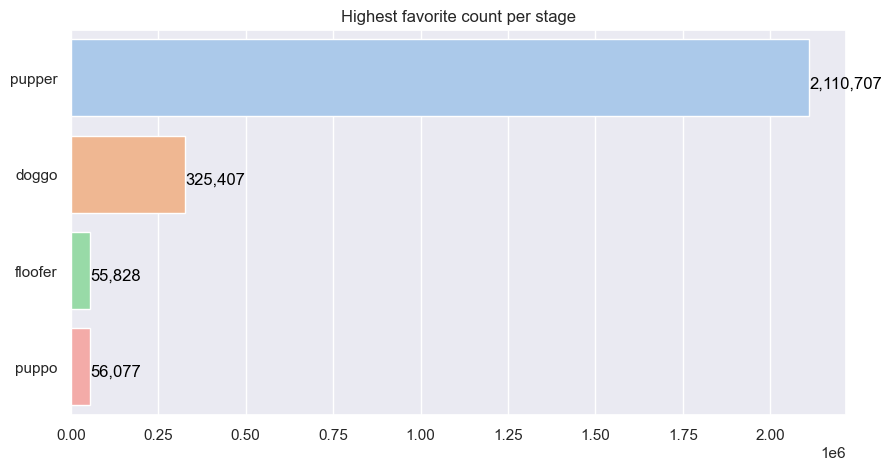

In [49]:
pivot_stage = df_clean.pivot_table(index=['stage'], values=['favorite_count'], aggfunc='sum')
pivot_stage
# Set color palette
sns.color_palette("mako", as_cmap=True)
color = sns.color_palette("pastel", 10)
sns.set(rc={'figure.figsize': (10, 5)})
sns.set(font_scale=1)

ax = sns.barplot(y=pivot_stage.index,
                 x='favorite_count',
                 data=pivot_stage,
                 palette=color,
                 order=["pupper","doggo", "floofer",  "puppo"],
                 errorbar=None)
plt.title('Highest favorite count per stage')
plt.ylabel('')
plt.xlabel('')
plt.savefig('stages')
# Add labels to the bars in the plot
for i, v in enumerate(ax.patches):
    ax.text(v.get_width() + 1000, i+0.1, f"{int(v.get_width()):,}", color='black', fontweight='light')

- The data reveals a striking pattern - the "pupper" stage reigns supreme with a whopping 2,110,707 favorites, making up a massive 84.19% of all stage classifications. It's worth noting that this percentage doesn't even include the "none" stage, further emphasizing the dominance of "pupper" over other stage categories. This highlights the incredible impact of a cute puppy picture and how it can significantly boost the chances of getting favorited by the audience.

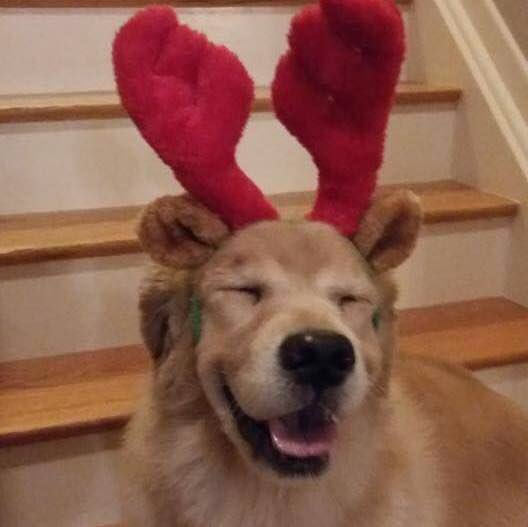

In [50]:
#random top breed image
import random
top_breed = df_clean[df_clean["breed"]=="golden retriever"]
url_list = top_breed.jpg_url.tolist()
url = random.choice(url_list)
response = requests.get(url)
Image.open(BytesIO(response.content))
